# **Diabetes_Project V1.0**

# 1. Business Understanding

# 2. Data Collecting

In [1]:
# load dataset
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('drive/MyDrive/diabetes_prediction_dataset.csv')

Mounted at /content/drive


In [ ]:
# print dataset
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


# 3. Data Understanding

In [ ]:
# print number of duplicates, na, and null values
print(f"duplicat: {df.duplicated().sum()}")
print(f"\nna\n{df.isna().sum()}")
print(f"\nnull\n{df.isnull().sum()}")

duplicat: 3854

na
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

null
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [2]:
# retrieve all labels and store in a list
columns_df = list(df.columns.values)
# iterate over the list to print all unique values of each column in the dataframe
for column in columns_df:
    print(column, ':', str(df[column].unique()))

gender : ['Female' 'Male' 'Other']
age : [80.   54.   28.   36.   76.   20.   44.   79.   42.   32.   53.   78.
 67.   15.   37.   40.    5.   69.   72.    4.   30.   45.   43.   50.
 41.   26.   34.   73.   77.   66.   29.   60.   38.    3.   57.   74.
 19.   46.   21.   59.   27.   13.   56.    2.    7.   11.    6.   55.
  9.   62.   47.   12.   68.   75.   22.   58.   18.   24.   17.   25.
  0.08 33.   16.   61.   31.    8.   49.   39.   65.   14.   70.    0.56
 48.   51.   71.    0.88 64.   63.   52.    0.16 10.   35.   23.    0.64
  1.16  1.64  0.72  1.88  1.32  0.8   1.24  1.    1.8   0.48  1.56  1.08
  0.24  1.4   0.4   0.32  1.72  1.48]
hypertension : [0 1]
heart_disease : [1 0]
smoking_history : ['never' 'No Info' 'current' 'former' 'ever' 'not current']
bmi : [25.19 27.32 23.45 ... 59.42 44.39 60.52]
HbA1c_level : [6.6 5.7 5.  4.8 6.5 6.1 6.  5.8 3.5 6.2 4.  4.5 9.  7.  8.8 8.2 7.5 6.8]
blood_glucose_level : [140  80 158 155  85 200 145 100 130 160 126 159  90 260 220 300 280

# 4. Exploratory Data Analysis

## 4.1 Univariate visualization

### Categorical Features Visualization
- <b>Count Plots</b>: For each categorical feature (e.g., gender, hypertension, heart_disease, smoking_history, diabetes), count plots are generated. These plots display the frequency distribution of categories within each feature. Annotations on the bars represent the percentage of the total dataset that each category occupies. This visualization helps identify imbalances or biases in categorical data, such as overrepresentation of a particular gender or the prevalence of heart disease within the sample.

### Numerical Features Visualization
Three types of plots are generated for each numerical feature (e.g., age, bmi, HbA1c_level, blood_glucose_level):

- Histogram with KDE (Kernel Density Estimate):

  - The histogram displays the distribution of the data, showing how many instances fall into each bin of the feature's range.
  - The KDE curve provides a smooth estimate of the distribution, highlighting the shape (e.g., normal distribution, skewness).
  - A vertical line represents the mean of the distribution, with an annotation detailing the mean and standard deviation (SD). This gives a sense of the central tendency and spread of the data.

- Box Plot:
  - The box plot visualizes the distribution of the data in terms of quartiles, highlighting the median (50th percentile) and the interquartile range (IQR, the range between the 25th and 75th percentiles).
  - Outliers can also be identified as points that fall outside the "whiskers" of the box plot.
  - An annotation provides the median value, offering quick insight into the central value of the distribution without being influenced by outliers.

- Violin Plot:
  - The violin plot combines aspects of the box plot with a KDE to show the distribution's density at different values.
  - It offers a more nuanced view of the data distribution, including the presence of multiple peaks (modes).
  - Annotations for the median and IQR give a quick statistical summary, similar to the box plot, but within the context of the data's overall distribution shape.

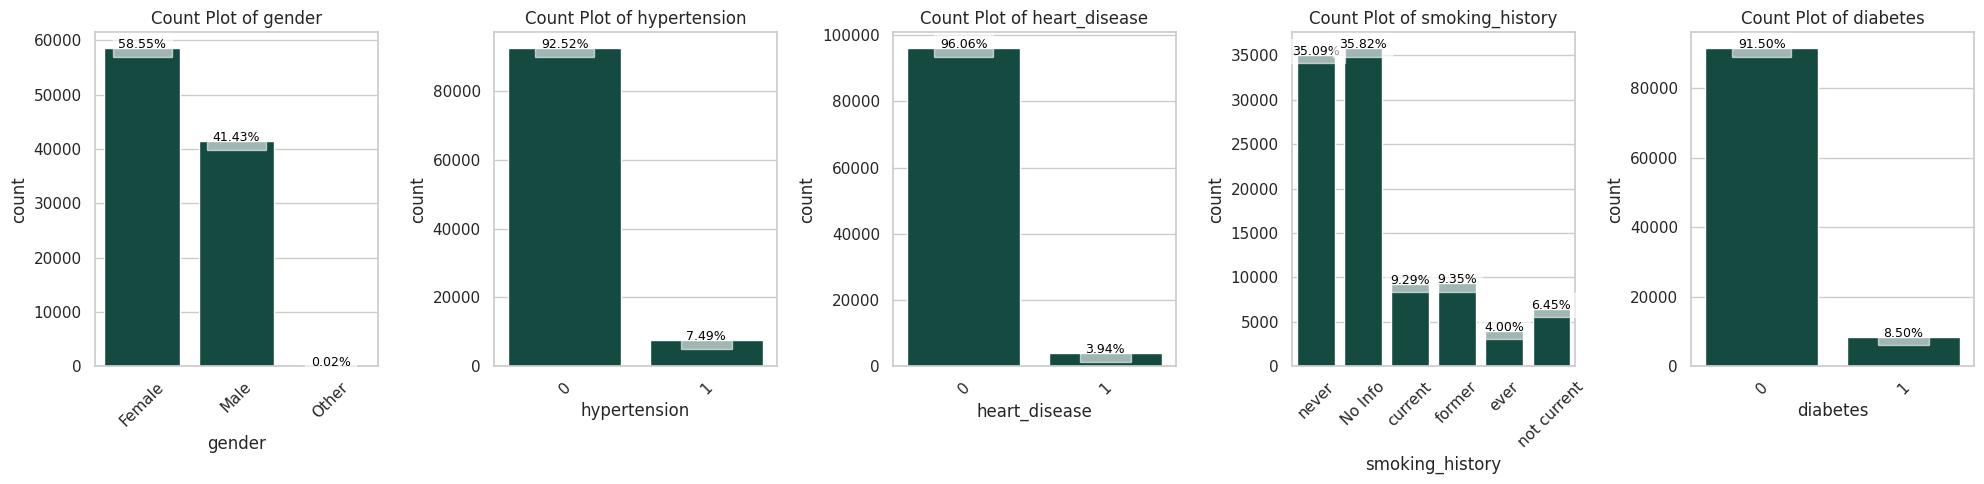

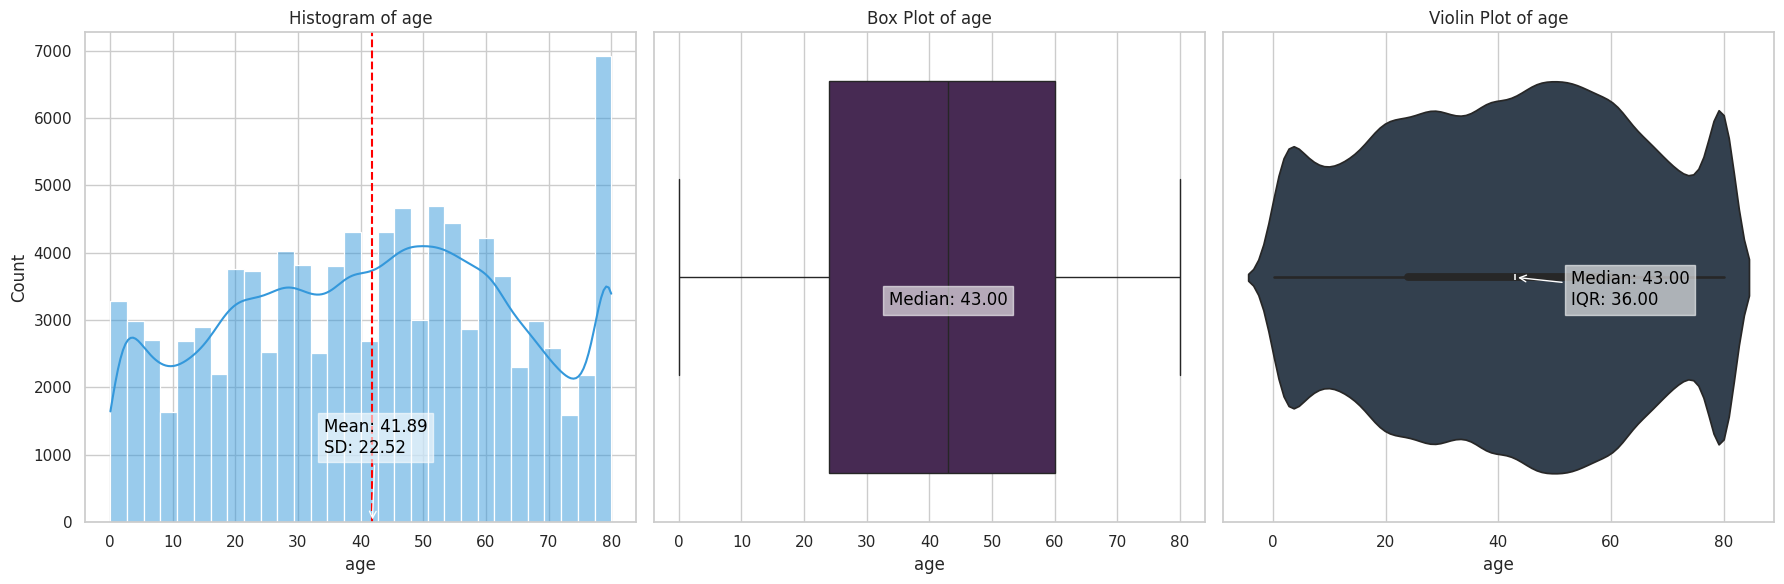

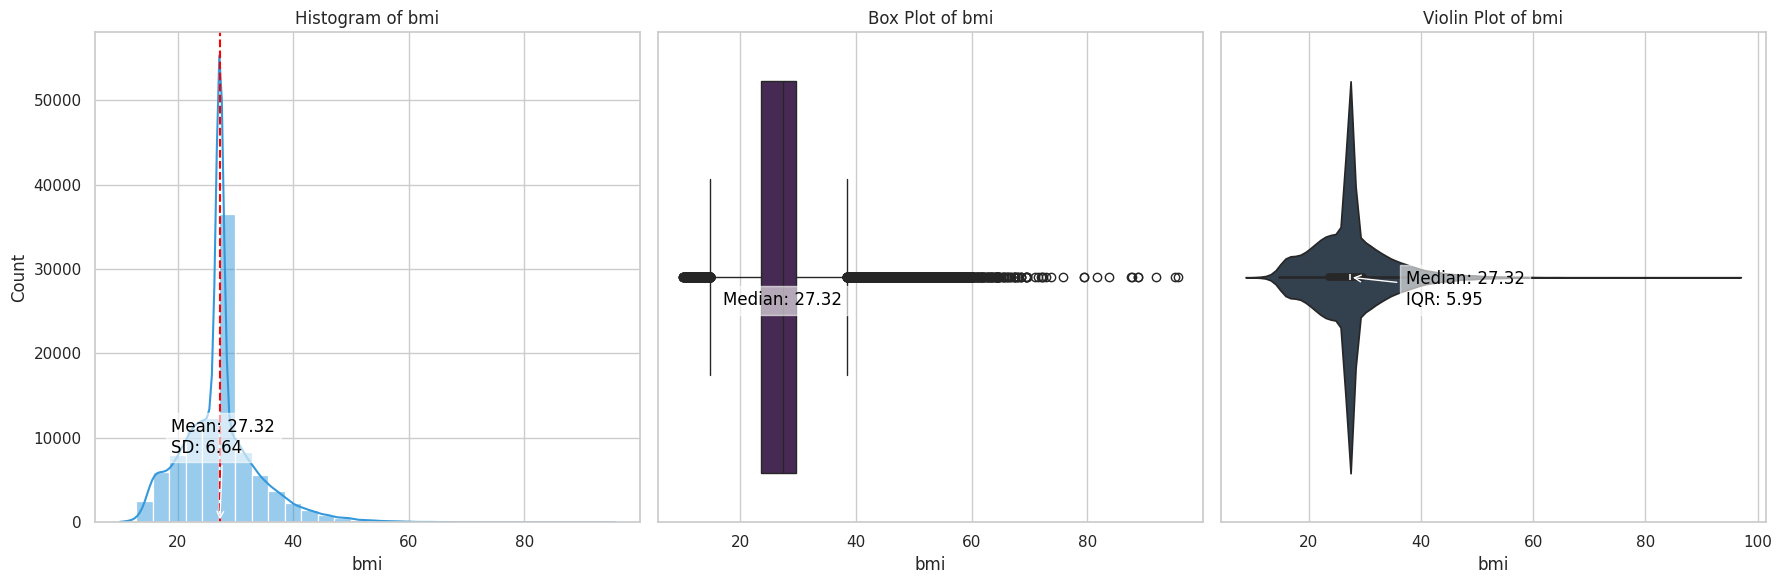

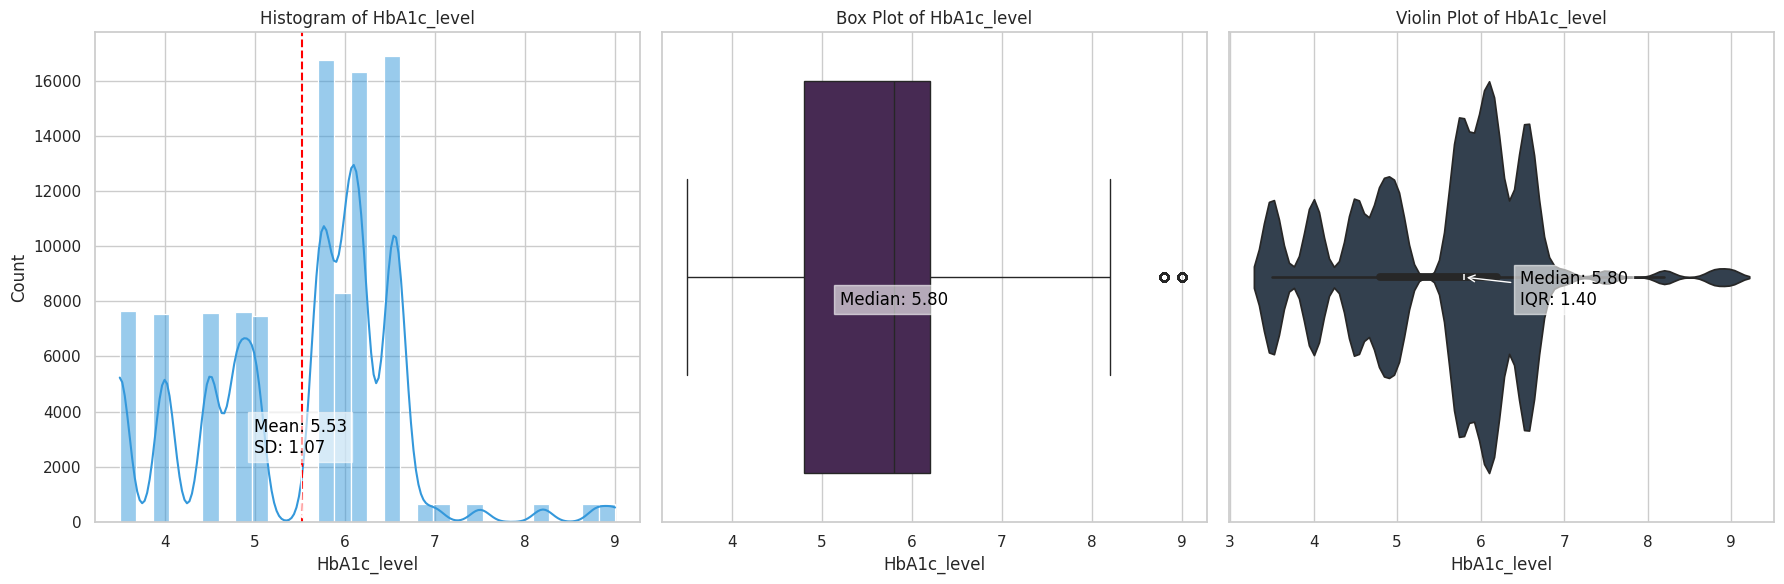

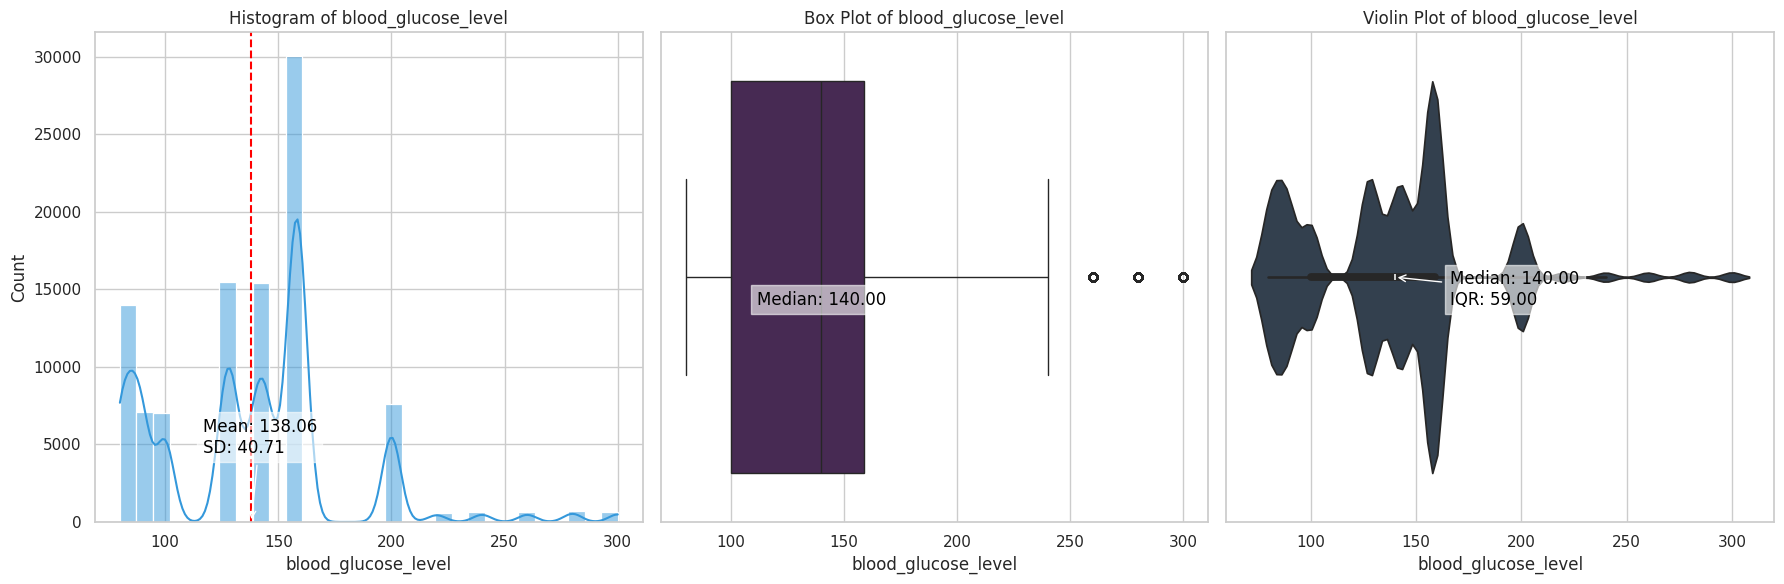

In [49]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

def univariate_visualization(df, categorical_features, numerical_features):
    sns.set_style("whitegrid")

    # Visualization for categorical features
    fig, axs = plt.subplots(1, len(categorical_features), figsize=(20, 5))
    for i, feature in enumerate(categorical_features):
        total = float(len(df))
        ax = sns.countplot(x=feature, data=df, color='#0B5345', ax=axs[i])
        ax.tick_params(axis='x', rotation=45)
        ax.set_title(f'Count Plot of {feature}')
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.2f}%'.format((height/total)*100), ha="center",
                    color='black', fontsize=9, bbox=dict(facecolor='white', alpha=0.6))

    plt.tight_layout()
    plt.show()

    # Visualization for numerical features
    for feature in numerical_features:
        fig, ax = plt.subplots(1, 3, figsize=(18, 6))

        # Histogram with KDE, mean, and SD
        sns.histplot(df[feature], kde=True, bins=30, ax=ax[0], color='#3498DB')
        mean_value = df[feature].mean()
        std_dev = df[feature].std()
        ax[0].axvline(mean_value, color='red', linestyle='--')
        ax[0].annotate(f'Mean: {mean_value:.2f}\nSD: {std_dev:.2f}', xy=(mean_value, 0), xytext=(-35, 50),
                       textcoords='offset points', arrowprops=dict(arrowstyle="->"), color='black',
                       bbox=dict(facecolor='white', alpha=0.6))
        ax[0].set_title(f'Histogram of {feature}')

        # Box plot with median
        sns.boxplot(x=df[feature], ax=ax[1], color='#4A235A')
        median_value = df[feature].median()
        ax[1].annotate(f'Median: {median_value:.2f}', xy=(median_value, 0), xytext=(0, -20),
                       textcoords='offset points', color='black', ha='center',
                       bbox=dict(facecolor='white', alpha=0.6))
        ax[1].set_title(f'Box Plot of {feature}')

        # Violin plot with median and IQR
        sns.violinplot(x=df[feature], ax=ax[2], color='#2E4053')
        quartile75, quartile25 = np.percentile(df[feature], [75, 25])
        iqr = quartile75 - quartile25
        ax[2].annotate(f'Median: {median_value:.2f}\nIQR: {iqr:.2f}', xy=(median_value, 0), xytext=(40, -20),
                       textcoords='offset points', arrowprops=dict(arrowstyle="->"), color='black',
                       bbox=dict(facecolor='white', alpha=0.6))
        ax[2].set_title(f'Violin Plot of {feature}')

        plt.tight_layout()
        plt.show()

# Categorical and Numerical features
categorical_features = ['gender', 'hypertension', 'heart_disease', 'smoking_history', 'diabetes']
numerical_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Visualization function
univariate_visualization(df, categorical_features, numerical_features)


# 5. Preprocessing

In [ ]:
# drop duplicate values
df = df.drop_duplicates()
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [ ]:
# clone dataset for encoding
encoded_df = df.copy()

In [ ]:
# encode the database
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Define a LabelEncoder
le = LabelEncoder()

# Get a list of categorical column names
categorical_cols = encoded_df.select_dtypes(include=['object', 'category']).columns.tolist()

# mix of label encoding and one-hot encoding
for col in categorical_cols:
    if len(encoded_df[col].unique()) <= 2:
        # label encode binary variables
        encoded_df[col] = le.fit_transform(encoded_df[col])
    else:
        # one-hot encode non-binary variables
        encoded_df = pd.get_dummies(encoded_df, columns=[col])

encoded_df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,1,0,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,0,1,0,0,1,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,0,0,1,0,0,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,1,0,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,0,0,1,0,0,1,0,0,0,0


In [ ]:
# split the encoded_dataset into train and test set
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(encoded_df, train_size=0.80)
data_train.shape, data_test.shape

((76916, 16), (19230, 16))

In [ ]:
# split the train and test set into X (features) and y (target, diabetes)
X_train = data_train.drop('diabetes', axis=1)
y_train = data_train['diabetes']
print(X_train.shape, y_train.shape)

X_test = data_test.drop('diabetes', axis=1)
y_test = data_test['diabetes']
print(X_test.shape, y_test.shape)

(76916, 15) (76916,)
(19230, 15) (19230,)


In [ ]:
# scale the test set
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# print the number of samples for each class, and check if the dataset is balanced or not
encoded_df['diabetes'].value_counts()

0    87664
1     8482
Name: diabetes, dtype: int64

In [ ]:
# balance the dataset using SMOTE (Synthetic Minority Oversampling Technique)
from imblearn.over_sampling import SMOTE
from collections import Counter
smote = SMOTE(sampling_strategy='minority')
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print('Original: {}'.format(Counter(y_train)))
print('   SMOTE: {}'.format(Counter(y_train_smote)))

Original: Counter({0: 70202, 1: 6714})
   SMOTE: Counter({0: 70202, 1: 70202})


In [ ]:
# kfold cross validation
# make a 10 fold cross validation, used for GridSearch to find best parameters (not usable in this code)
from sklearn.model_selection import KFold
cv = KFold(n_splits=10, random_state=None,shuffle=False)

# 6. Model Training

In [ ]:
# set best parameters to model
# train the model
# calculate the classification report
# plot ROC and CM
# store model metrics

import time
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import pandas as pd

# Global dictionaries to store ROC data and model metrics
roc_data_dict = {}
model_metrics = {}

def fit_model_with_params(model,
                          params,
                          X_train,
                          y_train,
                          X_test,
                          y_test,
                          model_name,
                          verbose_level=3):

    timings = {}

    # Set the model with best parameters
    model.set_params(**params)

    # Train the model
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    timings['Model Training'] = training_time

    # Evaluate the model
    start_time = time.time()
    y_pred = model.predict(X_test)
    timings['Model Evaluation'] = time.time() - start_time

    # Calculate and print classification report
    print("Classification Report for", model_name, ":\n", classification_report(y_test, y_pred))

    # Calculate precision, recall, and F1-score for each class
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)

    # Plot Confusion Matrix
    plt.figure(figsize=(5, 4))
    cm = confusion_matrix(y_test, y_pred)
    sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.title('Confusion Matrix for ' + model_name)
    plt.show()

    # Plot ROC Curve
    plt.figure(figsize=(5, 4))
    scoring_methods = ['predict_proba', 'decision_function']
    roc_data = {}

    for method in scoring_methods:
        if hasattr(model, method):
            score = getattr(model, method)(X_test)
            if score.ndim > 1:
                score = score[:, 1]
            fpr, tpr, thresholds = roc_curve(y_test, score)
            roc_auc = auc(fpr, tpr)
            roc_data[method] = {'fpr': fpr, 'tpr': tpr, 'auc': roc_auc}
            plt.plot(fpr, tpr, label=f'{model_name} ({method}) - AUC: {roc_auc:.3f}')
            plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('ROC Curve for ' + model_name)
            plt.legend()

            # If predict_proba is used, break the loop, so decision_function will not be used
            if method == 'predict_proba':
                break
    plt.show()

    # Print all timings
    for operation, duration in timings.items():
        print(f"{operation} Time: {duration:.2f} seconds for {model_name}")

    # Store ROC data
    roc_data_dict[model_name] = roc_data

    # Store metrics
    model_metrics[model_name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Class 0 Precision': precision[0],
        'Class 0 Recall': recall[0],
        'Class 0 F1 Score': f1_score[0],
        'Class 1 Precision': precision[1],
        'Class 1 Recall': recall[1],
        'Class 1 F1 Score': f1_score[1],
        'ROC AUC': roc_auc,
        'Training Time': training_time
    }

    return model


Classification Report for XGBoost :
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     17462
           1       0.89      0.71      0.79      1768

    accuracy                           0.97     19230
   macro avg       0.93      0.85      0.89     19230
weighted avg       0.96      0.97      0.96     19230



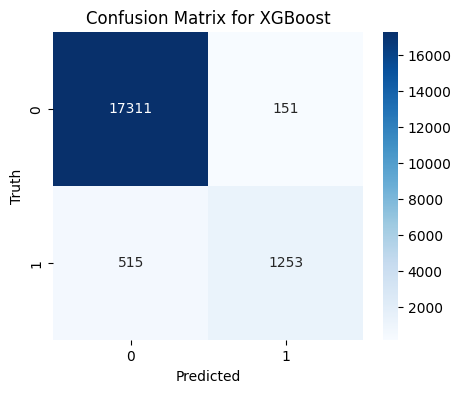

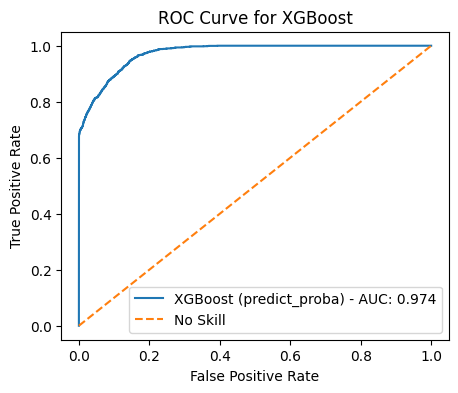

Model Training Time: 36.33 seconds for XGBoost
Model Evaluation Time: 0.13 seconds for XGBoost


In [ ]:
# XGBoost
import xgboost as xgb

# Parameter grid for XGBoost
param_grid_xgb = {
    'learning_rate': 0.2,
    'n_estimators': 300,
    'max_depth': 7,
    'gamma': 0.1,
    'subsample': 0.9,
    'colsample_bytree': 0.9
}

# Training the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
trained_xgb_model = fit_model_with_params(xgb_model,
                                          param_grid_xgb,
                                          X_train_smote,
                                          y_train_smote,
                                          X_test,
                                          y_test,
                                          "XGBoost")

Classification Report for Logistic Regression :
               precision    recall  f1-score   support

           0       0.99      0.89      0.93     17462
           1       0.44      0.88      0.59      1768

    accuracy                           0.89     19230
   macro avg       0.71      0.89      0.76     19230
weighted avg       0.94      0.89      0.90     19230



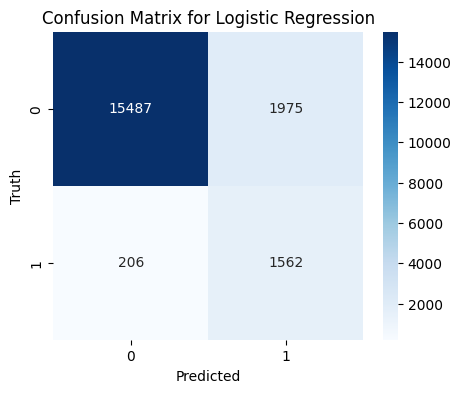

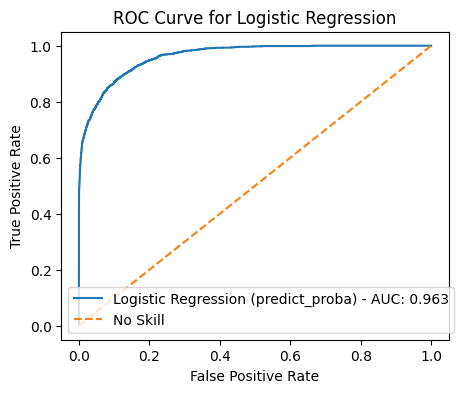

Model Training Time: 0.99 seconds for Logistic Regression
Model Evaluation Time: 0.00 seconds for Logistic Regression


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Parameter grid for Logistic Regression
param_grid_lr = {
    'C': 0.1,
    'penalty': 'l2',
    'solver': 'liblinear'
}

# Logistic Regression model
lr_model = LogisticRegression()
trained_lr_model = fit_model_with_params(lr_model,
                                         param_grid_lr,
                                         X_train_smote,
                                         y_train_smote,
                                         X_test,
                                         y_test,
                                         "Logistic Regression")

Classification Report for Decision Tree :
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     17462
           1       0.74      0.73      0.73      1768

    accuracy                           0.95     19230
   macro avg       0.86      0.85      0.85     19230
weighted avg       0.95      0.95      0.95     19230



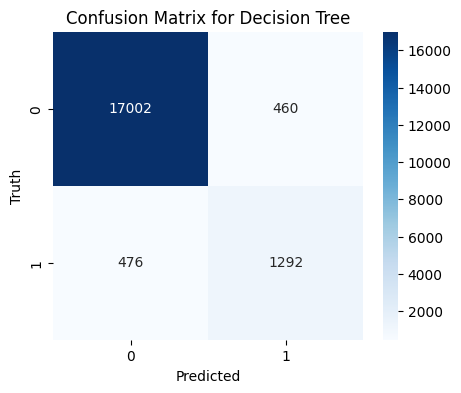

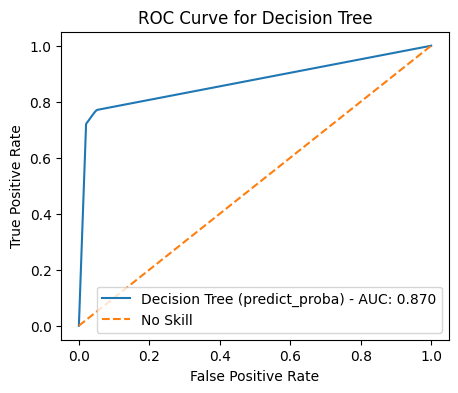

Model Training Time: 0.74 seconds for Decision Tree
Model Evaluation Time: 0.00 seconds for Decision Tree


In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Parameter grid for Decision Tree
param_grid_dt = {
    'criterion': 'entropy',
    'max_depth': None,
    'min_samples_split': 5,
    'min_samples_leaf': 2
}

# Decision Tree model
dt_model = DecisionTreeClassifier()
trained_dt_model = fit_model_with_params(dt_model,
                                         param_grid_dt,
                                         X_train_smote,
                                         y_train_smote,
                                         X_test,
                                         y_test,
                                         "Decision Tree")

Classification Report for KNN :
               precision    recall  f1-score   support

           0       0.98      0.94      0.96     17462
           1       0.57      0.76      0.66      1768

    accuracy                           0.93     19230
   macro avg       0.77      0.85      0.81     19230
weighted avg       0.94      0.93      0.93     19230



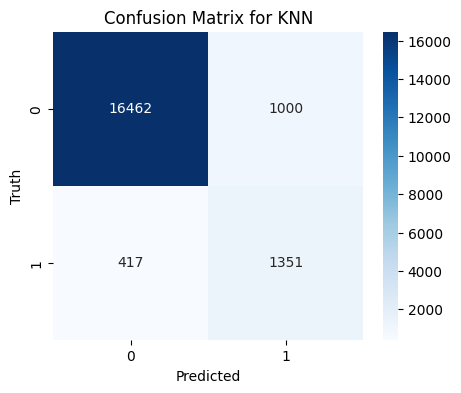

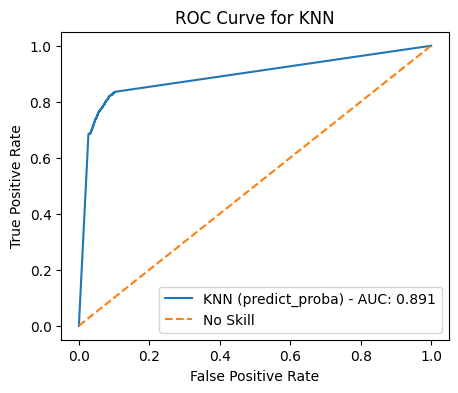

Model Training Time: 0.64 seconds for KNN
Model Evaluation Time: 39.94 seconds for KNN


In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

# Parameter grid for KNN
param_grid_knn = {
    'n_neighbors': 3,
    'weights': 'distance',
    'metric': 'manhattan'
}

# KNN model
knn_model = KNeighborsClassifier()
trained_knn_model = fit_model_with_params(knn_model,
                                          param_grid_knn,
                                          X_train_smote,
                                          y_train_smote,
                                          X_test,
                                          y_test,
                                          "KNN")

Classification Report for Random Forest :
               precision    recall  f1-score   support

           0       0.97      0.98      0.98     17462
           1       0.78      0.75      0.76      1768

    accuracy                           0.96     19230
   macro avg       0.88      0.86      0.87     19230
weighted avg       0.96      0.96      0.96     19230



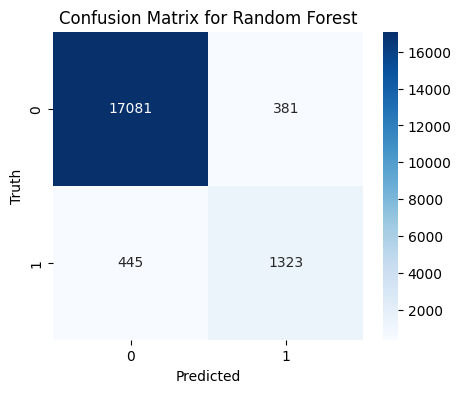

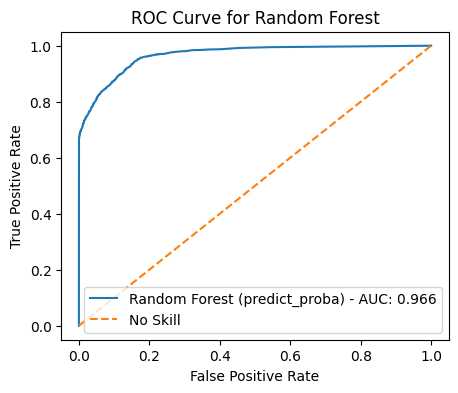

Model Training Time: 109.29 seconds for Random Forest
Model Evaluation Time: 2.08 seconds for Random Forest


In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Parameter grid for Random Forest
param_grid_rf = {
    'criterion': 'entropy',
    'n_estimators': 500,
    'max_depth': None,
    'min_samples_split': 2
}

# Random Forest model
rf_model = RandomForestClassifier()
trained_rf_model = fit_model_with_params(rf_model,
                                          param_grid_rf,
                                          X_train_smote,
                                          y_train_smote,
                                          X_test,
                                          y_test,
                                         'Random Forest')

Classification Report for AdaBoost :
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     17462
           1       0.82      0.76      0.79      1768

    accuracy                           0.96     19230
   macro avg       0.90      0.87      0.88     19230
weighted avg       0.96      0.96      0.96     19230



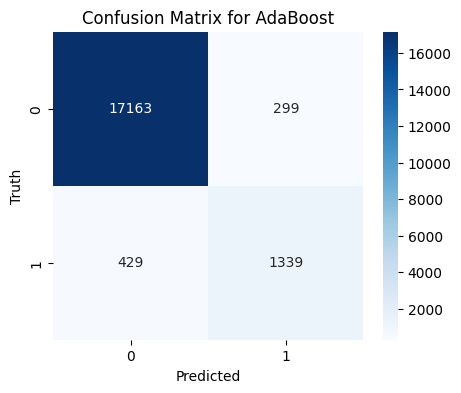

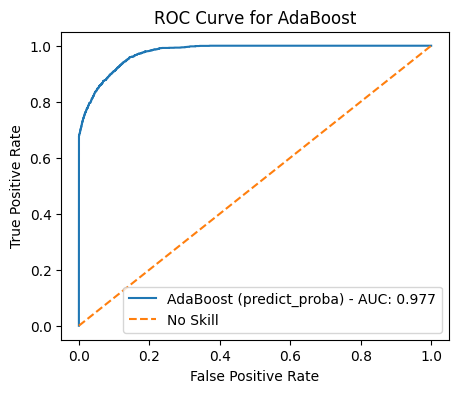

Model Training Time: 37.81 seconds for AdaBoost
Model Evaluation Time: 0.72 seconds for AdaBoost


In [ ]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier

# Parameter grid for AdaBoost
param_grid_ada = {
    'n_estimators': 200,
    'learning_rate': 1
}

# AdaBoost model
ada_model = AdaBoostClassifier()
trained_ada_model = fit_model_with_params(ada_model,
                                          param_grid_ada,
                                          X_train_smote,
                                          y_train_smote,
                                          X_test,
                                          y_test,
                                          'AdaBoost')

Classification Report for Perceptron :
               precision    recall  f1-score   support

           0       0.98      0.88      0.93     17462
           1       0.42      0.85      0.56      1768

    accuracy                           0.88     19230
   macro avg       0.70      0.86      0.74     19230
weighted avg       0.93      0.88      0.89     19230



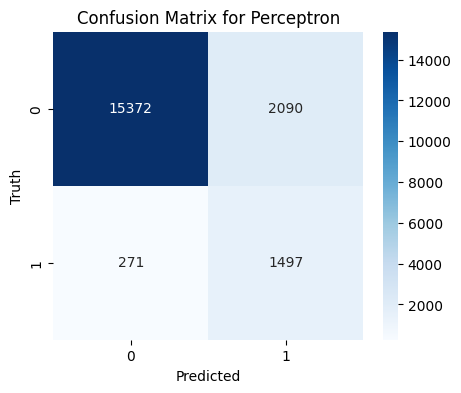

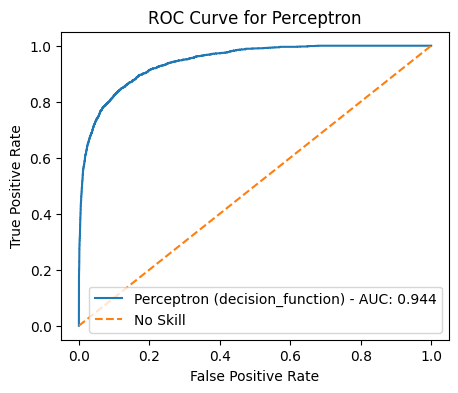

Model Training Time: 0.57 seconds for Perceptron
Model Evaluation Time: 0.00 seconds for Perceptron


In [ ]:
# Perceptron
from sklearn.linear_model import Perceptron

# Parameter grid for Perceptron
param_grid_perceptron = {
    'penalty': 'l2',
    'alpha': 0.0001,
    'max_iter': 1000
}

# Perceptron model
perceptron_model = Perceptron()
trained_perceptron_model = fit_model_with_params(perceptron_model,
                                                param_grid_perceptron,
                                                X_train_smote,
                                                y_train_smote,
                                                X_test,
                                                y_test,
                                                'Perceptron')

Classification Report for Naïve Baye :
               precision    recall  f1-score   support

           0       0.96      0.97      0.97     17462
           1       0.69      0.62      0.65      1768

    accuracy                           0.94     19230
   macro avg       0.83      0.79      0.81     19230
weighted avg       0.94      0.94      0.94     19230



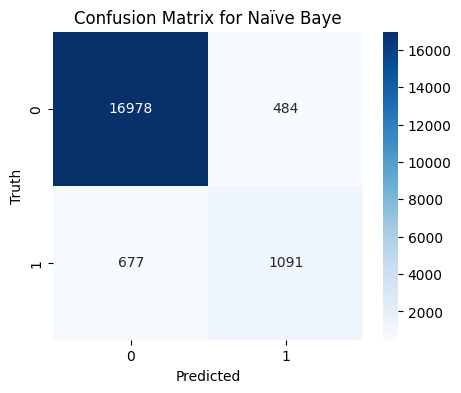

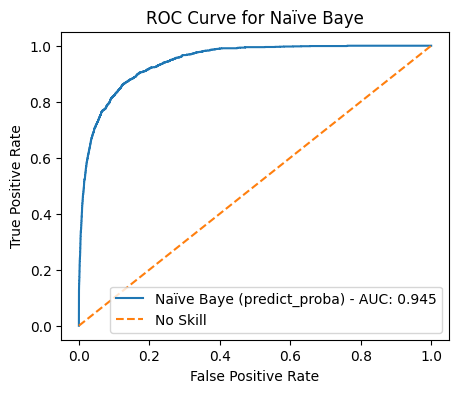

Model Training Time: 0.10 seconds for Naïve Baye
Model Evaluation Time: 0.01 seconds for Naïve Baye


In [ ]:
# Naïve Baye
from sklearn.naive_bayes import GaussianNB

# Parameter grid for Naive Bayes
param_grid_nb = {
    'var_smoothing': 10.0
}

# Naive Bayes model
nb_model=GaussianNB()
trained_nb_model = fit_model_with_params(nb_model,
                                        param_grid_nb,
                                        X_train_smote,
                                        y_train_smote,
                                        X_test,
                                        y_test,
                                        'Naïve Baye')

Classification Report for Gradient Boosting :
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     17462
           1       0.94      0.70      0.80      1768

    accuracy                           0.97     19230
   macro avg       0.95      0.85      0.89     19230
weighted avg       0.97      0.97      0.97     19230



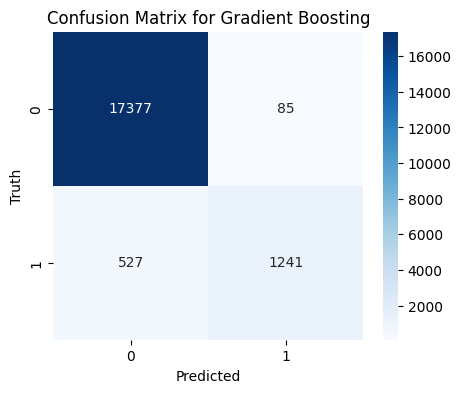

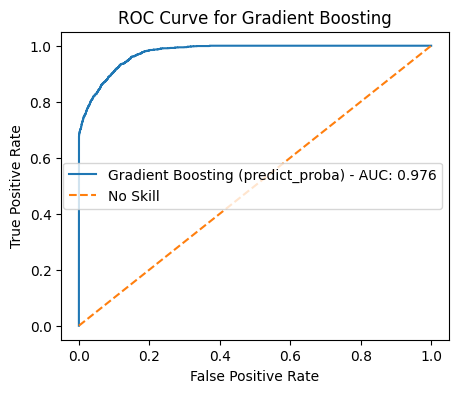

Model Training Time: 175.55 seconds for Gradient Boosting
Model Evaluation Time: 0.13 seconds for Gradient Boosting


In [ ]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

# Parameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': 300,
    'learning_rate': 0.2,
    'max_depth': 5
}

# Gradient Boosting model
gb_model=GradientBoostingClassifier()
trained_gb_model = fit_model_with_params(gb_model,
                                        param_grid_gb,
                                        X_train_smote,
                                        y_train_smote,
                                        X_test,
                                        y_test,
                                        'Gradient Boosting')

In [ ]:
# Make a Table
def display_sorted_model_metrics(sort_by='Accuracy'):
    metrics_df = pd.DataFrame.from_dict(model_metrics, orient='index')

    if sort_by not in metrics_df.columns:
        raise ValueError(f"Column '{sort_by}' not found in metrics. Available columns: {metrics_df.columns.tolist()}")

    sorted_df = metrics_df.sort_values(by=sort_by, ascending=False)
    return sorted_df

sorted_metrics_df = display_sorted_model_metrics(sort_by='Accuracy')
sorted_metrics_df

,Accuracy,Class 0 Precision,Class 0 Recall,Class 0 F1 Score,Class 1 Precision,Class 1 Recall,Class 1 F1 Score,ROC AUC,Training Time
Gradient Boosting,0.968175,0.970565,0.995132,0.982695,0.935897,0.701923,0.802198,0.976449,175.550609
XGBoost,0.965367,0.971110,0.991353,0.981127,0.892450,0.708710,0.790038,0.973648,36.327578
AdaBoost,0.962142,0.975614,0.982877,0.979232,0.817460,0.757353,0.786260,0.976979,37.812866
Random Forest,0.957046,0.974609,0.978181,0.976392,0.776408,0.748303,0.762097,0.966303,109.290502
Decision Tree,0.951326,0.972766,0.973657,0.973211,0.737443,0.730769,0.734091,0.870365,0.740557
Naïve Baye,0.939626,0.961654,0.972283,0.966939,0.692698,0.617081,0.652707,0.945221,0.096602
KNN,0.926313,0.975295,0.942733,0.958737,0.574649,0.764140,0.655984,0.891008,0.635539
Logistic Regression,0.886583,0.986873,0.886897,0.934218,0.441617,0.883484,0.588878,0.962788,0.992754
Perceptron,0.877223,0.982676,0.880312,0.928681,0.417340,0.846719,0.559104,0.943847,0.571812


In [ ]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
import os

plt.rcParams['font.family'] = 'Liberation Serif'

# Plot all ROC curves
def plot_all_roc_curves(roc_data_dict):
    plt.figure(figsize=(10, 7), dpi=1200)

    # Create a list to hold (model_name, method, AUC) tuples
    auc_data = []

    # Collect all AUC values with corresponding model names and methods
    for model_name, roc_data in roc_data_dict.items():
        for method, data in roc_data.items():
            auc_data.append((model_name, method, data['auc']))

    # Sort the list of tuples based on AUC values in descending order
    auc_data.sort(key=lambda x: x[2], reverse=True)

    # Plot the ROC curves based on the sorted AUC values
    for model_name, method, auc_value in auc_data:
        data = roc_data_dict[model_name][method]
        plt.plot(data['fpr'], data['tpr'], label=f'{model_name} (AUC = {auc_value:.3f})')

    plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
    plt.xlabel("False Positive Rate", size=16, fontweight="bold")
    plt.ylabel("True Positive Rate", size=16, fontweight="bold")
    plt.legend(loc='best', fontsize=14)
    plt.show()

plot_all_roc_curves(roc_data_dict)

Output hidden; open in https://colab.research.google.com to view.